In [53]:
# Importing Liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importing dataset

ds = pd.read_csv("products.csv")
ds.head(2)

,Unnamed: 0,month,year,brandid,pwid,brandname,productname,name,weight
0,0,8,2020,3,167,Mahavir Steel,Angle,25*25*3mm,11.0
1,1,8,2020,17,1,TATA Pipes,G.I. Pipe(Mtr),100_5.4_C Class,1480.0


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18881 entries, 0 to 18880
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   18881 non-null  int64  
 1   month        18881 non-null  int64  
 2   year         18881 non-null  int64  
 3   brandid      18881 non-null  int64  
 4   pwid         18881 non-null  int64  
 5   brandname    18881 non-null  object 
 6   productname  18881 non-null  object 
 7   name         18881 non-null  object 
 8   weight       18881 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 1.3+ MB


In [55]:
def generate_year_month_df(start_year, start_month, end_year, end_month):
    # create a date range 
    date_range = pd.date_range(
        start = f"{start_year}-{start_month:02d}",
        end = f"{end_year}-{end_month:02d}",
        freq = "MS"      # start of the month frequency
    )
    # Create dataframe with year an month
    df = pd.DataFrame({
        'year': date_range.year,
        'month': date_range.month
    })
    return df

In [57]:
def generate_srno_for_month_year(srno, last_month, last_year, month, year):
    last_date = date(last_year, last_month,1)
    next_date = date(year, month, 1)

    diff = abs(relativedelta(next_date, last_date))      # correct order
    month_diff = diff.years*12+diff.months               # convert to month

    return srno + month_diff                             # adjusting sr.no. based on month diff

In [21]:
brandid = int(input("Enter brand id :"))
productid = int(input("Enter product id :"))
monthno = int(input("Enter monthno :"))
year = int(input("Enter year :"))

Enter brand id : 3
Enter product id : 167
Enter monthno : 3
Enter year : 2025


In [23]:
filtered_df = ds[(ds["brandid"]== brandid) & (ds["pwid"]== productid)]

In [25]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 18372
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   39 non-null     int64  
 1   month        39 non-null     int64  
 2   year         39 non-null     int64  
 3   brandid      39 non-null     int64  
 4   pwid         39 non-null     int64  
 5   brandname    39 non-null     object 
 6   productname  39 non-null     object 
 7   name         39 non-null     object 
 8   weight       39 non-null     float64
dtypes: float64(1), int64(5), object(3)
memory usage: 3.0+ KB


In [27]:
startyear = filtered_df["year"].min()
startmonth = filtered_df[filtered_df["year"]== startyear]["month"].min()
endyear = filtered_df["year"].max()
endmonth = filtered_df[filtered_df["year"]== endyear]["month"].max()

In [31]:
year_month_df = generate_year_month_df(startyear, startmonth, endyear, endmonth)

In [35]:
merged_df = pd.merge(year_month_df, filtered_df, on =['year','month'], how='left')

In [39]:
merged_df['weight'] = merged_df['weight'].fillna(0)

In [41]:
merged_df[['year','month','weight']]

,year,month,weight
0,2020,8,11.0
1,2020,9,330.0
2,2020,10,0.0
3,2020,11,0.0
4,2020,12,0.0
5,2021,1,0.0
6,2021,2,0.0
7,2021,3,198.0
8,2021,4,19.8
9,2021,5,145.2


In [43]:
merged_df['brandid'] = brandid
merged_df['pwid'] = productid
merged_df['year_month'] = merged_df['year'].astype(str) + '-' + merged_df['month'].astype(str)
merged_df.insert(0, 'srno', range(1, len(merged_df) +1))
merged_df['year'] = merged_df['year'].astype(int)
merged_df['month'] = merged_df['month'].astype(int)
merged_df['srno'] = merged_df['srno'].astype(int)

In [45]:
X = merged_df[['srno']]
y = merged_df[['weight']]

Text(0.5, 1.0, 'Month on month product sale from8/2020to1/2025')

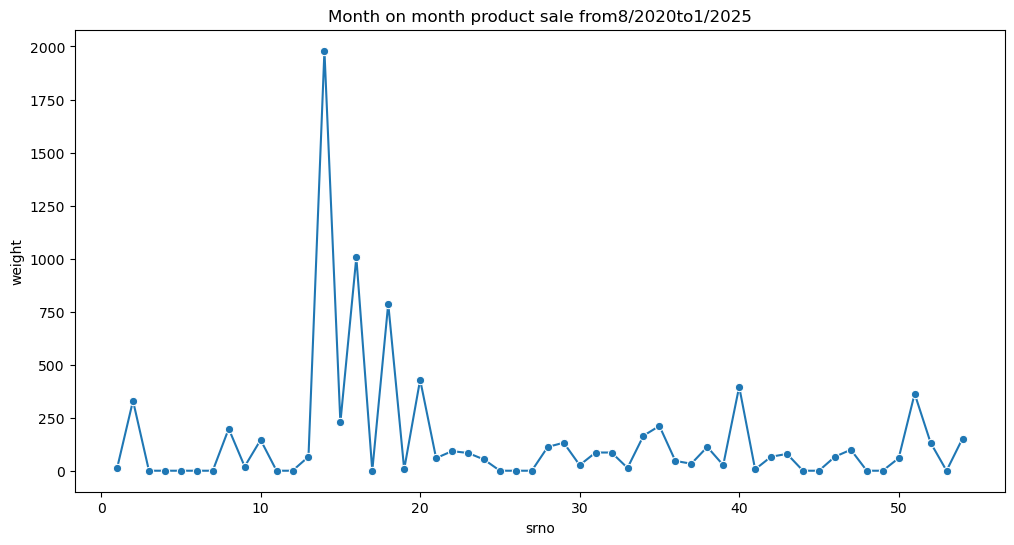

In [47]:
# Plot Line Chart

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=merged_df, x= 'srno', y='weight', marker = 'o', ax=ax)
ax.set_title("Month on month product sale from" + str(startmonth) + "/" + str(startyear) + "to" + str(endmonth) + "/" + str(endyear))


In [59]:
last_year = merged_df.iloc[-1]['year']
last_month = merged_df.iloc[-1]['month']
srno = merged_df.iloc[-1]['srno']
nextsrno = generate_srno_for_month_year(srno, last_month, last_year, monthno,year)

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [69]:
model.predict([[nextsrno]])

array([[68.46666413]])